In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"]   = 12
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
CORTEX = ['V1',   'LM',    'AL',   'RL',    'PM',    'AM']#,    'CA1', 'LP', 'APN']
cortex = ['VISp', 'VISl', 'VISal', 'VISrl', 'VISpm', 'VISam']#, 'CA1', 'LP', 'APN']

In [3]:
def create_graph(adj_matrix):
    G = nx.MultiDiGraph()
    G.add_nodes_from(CORTEX)
    for index, i in enumerate(CORTEX):
        for jndex, j in enumerate(CORTEX):
            if i == j:
                continue
            weight = adj_matrix[index, jndex]
            G.add_edge(i, j, weight=weight)
    return G

def scale_matrix(matrix, min_new, max_new):
    cleaned_mat   = matrix[~np.isnan(matrix)]
    scaled_matrix = (matrix - np.min(cleaned_mat)) * (max_new - min_new) / (np.max(cleaned_mat) - np.min(cleaned_mat)) + min_new
    return scaled_matrix

In [4]:
df = pd.read_excel('41586_2019_1716_MOESM5_ESM.xlsx', sheet_name='all CC connection strengths')

In [5]:
df      = df[(df['Selected anchor for Figures?']=='Y') & (df['hemisphere']=='ipsi') & (df['Mouse Line']=='C57BL/6J / Emx1')]
scortex = ['VISp-1', 'VISl', 'VISal', 'VISpm', 'VISam', 'VISrl']

CC_connectivity = np.zeros((6,6))
for sndex, source in enumerate(cortex):
    for tndex, target in enumerate(cortex):
        if sndex == tndex:
            CC_connectivity[sndex, tndex] = np.nan
            continue
        CC_connectivity[sndex, tndex] = df[(df['Exp Source']==source) & (df['Target']==target)]['NPV (online)']
adj_mat = scale_matrix(CC_connectivity, 5, 17)
G       = create_graph(adj_mat)

Text(0.5, 1.0, 'average corticocortical connections')

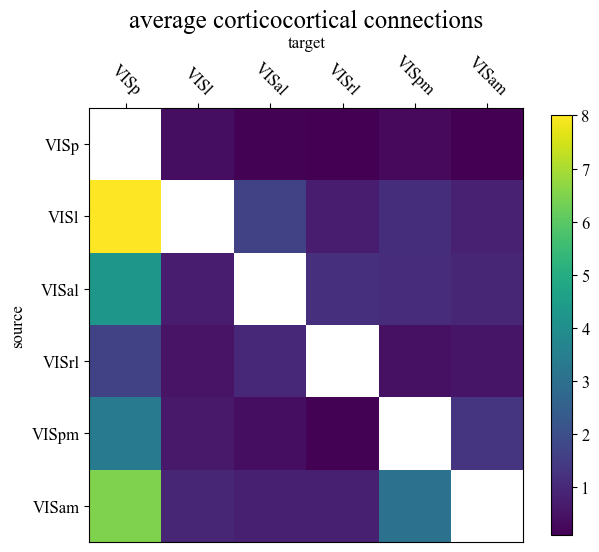

In [6]:
mat = np.copy(CC_connectivity)
fig, ax = plt.subplots(figsize=(7,7))
plt.imshow(mat)
plt.colorbar(shrink=0.78)
plt.xticks(ticks=np.arange(6), labels=cortex, rotation=-45)
plt.xlabel('target')
plt.ylabel('source')
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.yticks(ticks=np.arange(6), labels=cortex)
plt.title('average corticocortical connections', fontsize=18)
#fig.savefig(r'C:\Users\farzad.karimi1\Desktop\average_CC_connection.pdf')

Text(-2.68, 3.35, 'Anatomical Hierarchy Score')

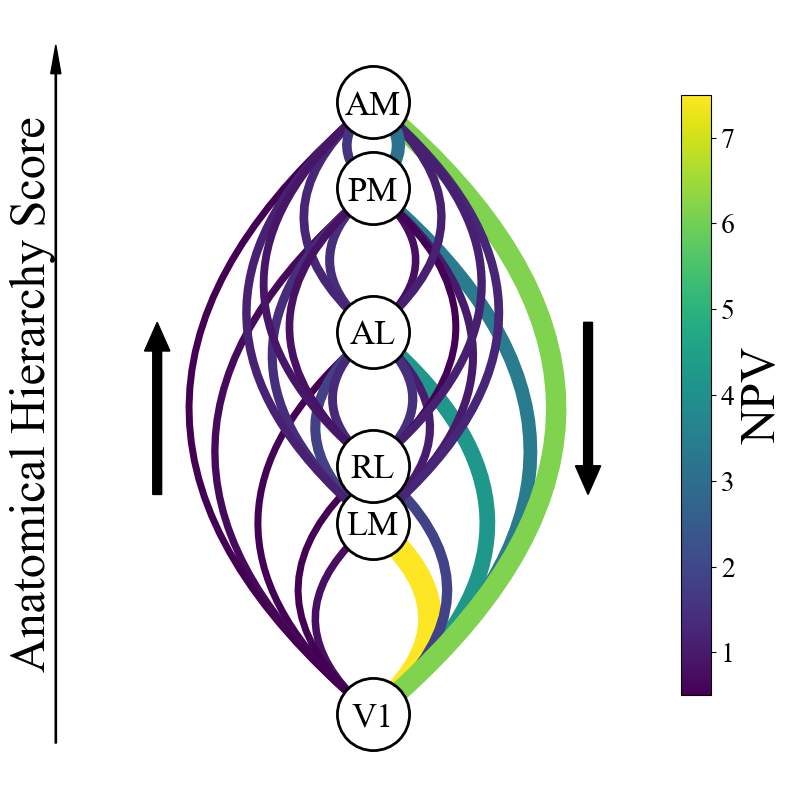

In [7]:
fig, ax      = plt.subplots(figsize=(10,10))
pos          = nx.spring_layout(G)
thickness    = np.array([data['weight'] for _, _, data in G.edges(data=True)])
norm         = mcolors.Normalize(vmin=thickness.min(), vmax=thickness.max())
cmap         = plt.cm.viridis
edge_colors  = [cmap(norm(weight)) for weight in thickness]
labelPosDict = {'V1':[0,-.04], 'LM':[0,1.96], 'AL':[0,3.96], 'RL':[0,2.56], 'AM':[0,6.36], 'PM':[0,5.46]}
nodePosDict  = {'V1':[0,0],    'LM':[0,2],    'AL':[0,4],    'RL':[0,2.6],  'AM':[0,6.4],  'PM':[0,5.5]}
nx.draw_networkx_nodes(G, pos=nodePosDict, node_color='white', edgecolors='k', node_size=2700, linewidths=2)
nx.draw_networkx_labels(G, pos=labelPosDict, font_family="Times New Roman", font_color='k', font_size=25)
nx.draw_networkx_edges(G, pos=nodePosDict, width=thickness, edge_color=edge_colors, arrowstyle='-', arrowsize=25, connectionstyle="Arc3, rad=-.6", min_source_margin=10, min_target_margin=25)
ax.arrow(x=1.7, y=3.2+.9, dx=0, dy=-1.5, width=.07, head_width=0.2, head_length=0.3, fc='k', ec='k')
ax.arrow(x=-1.7, y=3.2-.9, dx=0, dy=1.5, width=.07, head_width=0.2, head_length=0.3, fc='k', ec='k')
ax.arrow(x=-2.5, y=-.3, dx=0, dy=7, width=.01, head_width=0.08, head_length=0.3, fc='k', ec='k')
# norm1 = mcolors.Normalize(vmin=np.min(CC_connectivity[~np.isnan(CC_connectivity)]), vmax=np.max(CC_connectivity[~np.isnan(CC_connectivity)]))
norm1 = mcolors.Normalize(vmin=0.5, vmax=7.5)
sm    = plt.cm.ScalarMappable(cmap=cmap, norm=norm1)
sm.set_array([])
cbar  = plt.colorbar(sm, ax=ax, shrink=0.78)
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7])
cbar.set_ticklabels(['1', '2', '3', '4', '5', '6', '7'])
cbar.ax.tick_params(labelsize=20)
cbar.set_label('NPV', fontsize=35)
#cbar.set_label('NPV', fontsize=20)
ax.axis('off')
ax.text(-2.68, 3.35, 'Anatomical Hierarchy Score', rotation=90, fontsize=35, va='center', ha='center')
#fig.savefig(r'C:\Users\farzad.karimi1\Desktop\CC_network.pdf')